<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Armin Ghasemi</b><br><br>810100198</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>deep learning </b><br><br>HW_5 Q1</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Amirhossein samoudi </b><br><br>810100108</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>


### imports

In [11]:
import os
from google.colab import drive
from datasets import load_dataset
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import os
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import random
import shutil
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, Model, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import time
import tensorflow as tf
from tensorflow.keras import layers, models, Model, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import time
import tensorflow as tf
from tensorflow.keras import layers, models, Model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### mount drive and Loading data

In [7]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset from HuggingFace
dataset = load_dataset("ArianFiroozi/NNDL_HW5_S2025")

# Create a target folder in Google Drive
target_dir = "/content/drive/MyDrive/tomato_leaf_dataset"
os.makedirs(target_dir, exist_ok=True)

# Save images from dataset to Google Drive
for split in dataset.keys():
    split_dir = os.path.join(target_dir, split)
    os.makedirs(split_dir, exist_ok=True)
    for i, item in enumerate(dataset[split]):
        # each item contains 'image' and 'label'
        image = item['image']
        label = str(item['label'])
        label_dir = os.path.join(split_dir, label)
        os.makedirs(label_dir, exist_ok=True)
        image.save(os.path.join(label_dir, f"{split}_{i}.jpg"))

print("Dataset saved to Google Drive.")


Dataset saved to Google Drive.


### Data preparation

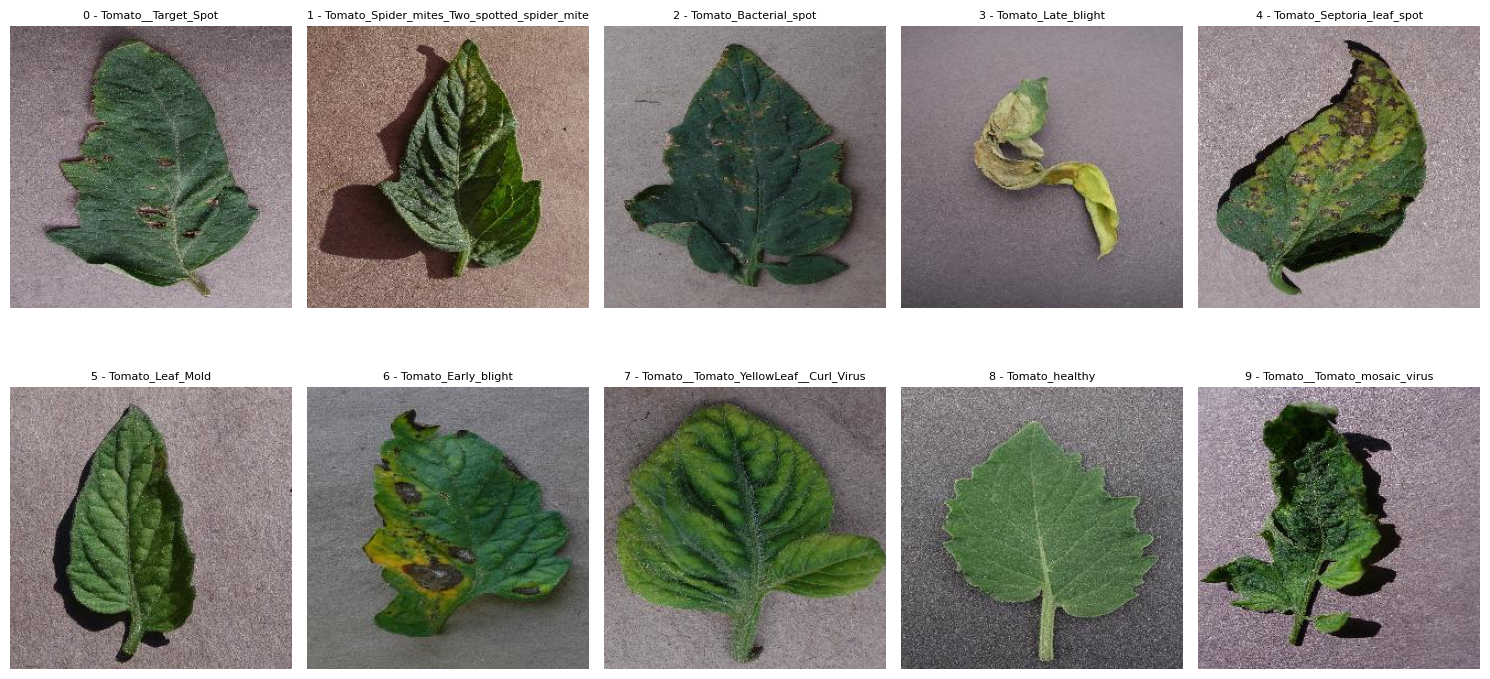

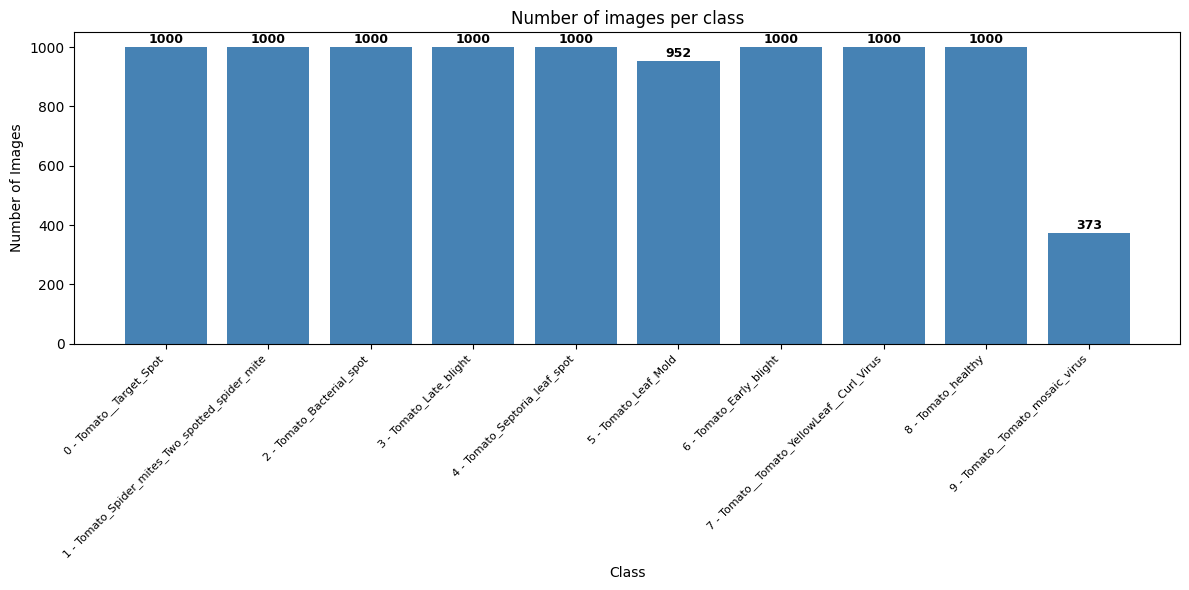

Total number of images: 9325


In [ ]:
# Path to dataset (adjust if needed)
data_dir = "/content/drive/MyDrive/tomato_leaf_dataset/train"

# Class label mapping
class_labels = {
    "0": "Tomato__Target_Spot",
    "1": "Tomato_Spider_mites_Two_spotted_spider_mite",
    "2": "Tomato_Bacterial_spot",
    "3": "Tomato_Late_blight",
    "4": "Tomato_Septoria_leaf_spot",
    "5": "Tomato_Leaf_Mold",
    "6": "Tomato_Early_blight",
    "7": "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "8": "Tomato_healthy",
    "9": "Tomato__Tomato_mosaic_virus"
}

# Sorted list of class directories
class_dirs = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

# Show one image per class
plt.figure(figsize=(15, 8))
for idx, class_id in enumerate(class_dirs):
    class_path = os.path.join(data_dir, class_id)
    image_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, image_name)
    image = Image.open(image_path)

    plt.subplot(2, 5, idx + 1)
    plt.imshow(image)
    plt.title(f"{class_id} - {class_labels[class_id]}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


# Count images per class
class_counts = {class_id: len(os.listdir(os.path.join(data_dir, class_id))) for class_id in class_dirs}

# Plot bar chart
labels = [f"{cid} - {class_labels[cid]}" for cid in class_counts.keys()]
values = list(class_counts.values())

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color="steelblue")

# Annotate each bar with its count
for bar, value in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,
        str(value),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of images per class")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

# Print total number of images
total_images = sum(values)
print(f"Total number of images: {total_images}")



GENERATING DATASET FOR VISION TRANSFORMER (ViT)
--- Starting processing for output directory: /content/drive/MyDrive/ViT_data ---


<ipython-input-3-ff7be3d7a996>:47: UserWarning: Argument(s) 'max_holes, max_height, max_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


Class 'Tomato__Target_Spot': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato__Target_Spot: 100%|██████████| 2000/2000 [00:38<00:00, 51.39it/s]


Class 'Tomato_Spider_mites_Two_spotted_spider_mite': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_Spider_mites_Two_spotted_spider_mite: 100%|██████████| 2000/2000 [00:41<00:00, 47.66it/s]


Class 'Tomato_Bacterial_spot': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_Bacterial_spot: 100%|██████████| 2000/2000 [00:41<00:00, 48.57it/s]


Class 'Tomato_Late_blight': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_Late_blight: 100%|██████████| 2000/2000 [00:42<00:00, 46.68it/s]


Class 'Tomato_Septoria_leaf_spot': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_Septoria_leaf_spot: 100%|██████████| 2000/2000 [00:43<00:00, 45.70it/s]


Class 'Tomato_Leaf_Mold': Found 952 originals. Generating 2048 new images...


Augmenting Tomato_Leaf_Mold: 100%|██████████| 2048/2048 [00:42<00:00, 47.68it/s]


Class 'Tomato_Early_blight': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_Early_blight: 100%|██████████| 2000/2000 [00:43<00:00, 46.40it/s]


Class 'Tomato__Tomato_YellowLeaf__Curl_Virus': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato__Tomato_YellowLeaf__Curl_Virus: 100%|██████████| 2000/2000 [00:40<00:00, 49.07it/s]


Class 'Tomato_healthy': Found 1000 originals. Generating 2000 new images...


Augmenting Tomato_healthy: 100%|██████████| 2000/2000 [00:43<00:00, 46.03it/s]


Class 'Tomato__Tomato_mosaic_virus': Found 373 originals. Generating 2627 new images...


Augmenting Tomato__Tomato_mosaic_virus: 100%|██████████| 2627/2627 [00:55<00:00, 47.76it/s]


--- Processing for /content/drive/MyDrive/ViT_data completed successfully. ---

GENERATING DATASET FOR CNN
--- Starting processing for output directory: /content/drive/MyDrive/CNN_data ---
Class 'Tomato__Target_Spot': Found 1000 originals. Generating 500 new images...


Augmenting Tomato__Target_Spot: 100%|██████████| 500/500 [00:10<00:00, 47.51it/s]


Class 'Tomato_Spider_mites_Two_spotted_spider_mite': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_Spider_mites_Two_spotted_spider_mite: 100%|██████████| 500/500 [00:09<00:00, 50.49it/s]


Class 'Tomato_Bacterial_spot': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_Bacterial_spot: 100%|██████████| 500/500 [00:09<00:00, 52.94it/s]


Class 'Tomato_Late_blight': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_Late_blight: 100%|██████████| 500/500 [00:09<00:00, 51.13it/s]


Class 'Tomato_Septoria_leaf_spot': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_Septoria_leaf_spot: 100%|██████████| 500/500 [00:10<00:00, 48.58it/s]


Class 'Tomato_Leaf_Mold': Found 952 originals. Generating 548 new images...


Augmenting Tomato_Leaf_Mold: 100%|██████████| 548/548 [00:11<00:00, 48.71it/s]


Class 'Tomato_Early_blight': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_Early_blight: 100%|██████████| 500/500 [00:09<00:00, 51.98it/s]


Class 'Tomato__Tomato_YellowLeaf__Curl_Virus': Found 1000 originals. Generating 500 new images...


Augmenting Tomato__Tomato_YellowLeaf__Curl_Virus: 100%|██████████| 500/500 [00:09<00:00, 50.50it/s]


Class 'Tomato_healthy': Found 1000 originals. Generating 500 new images...


Augmenting Tomato_healthy: 100%|██████████| 500/500 [00:10<00:00, 48.00it/s]


Class 'Tomato__Tomato_mosaic_virus': Found 373 originals. Generating 1127 new images...


Augmenting Tomato__Tomato_mosaic_virus: 100%|██████████| 1127/1127 [00:22<00:00, 51.00it/s]


--- Processing for /content/drive/MyDrive/CNN_data completed successfully. ---

VISUALIZING AUGMENTATION SAMPLES


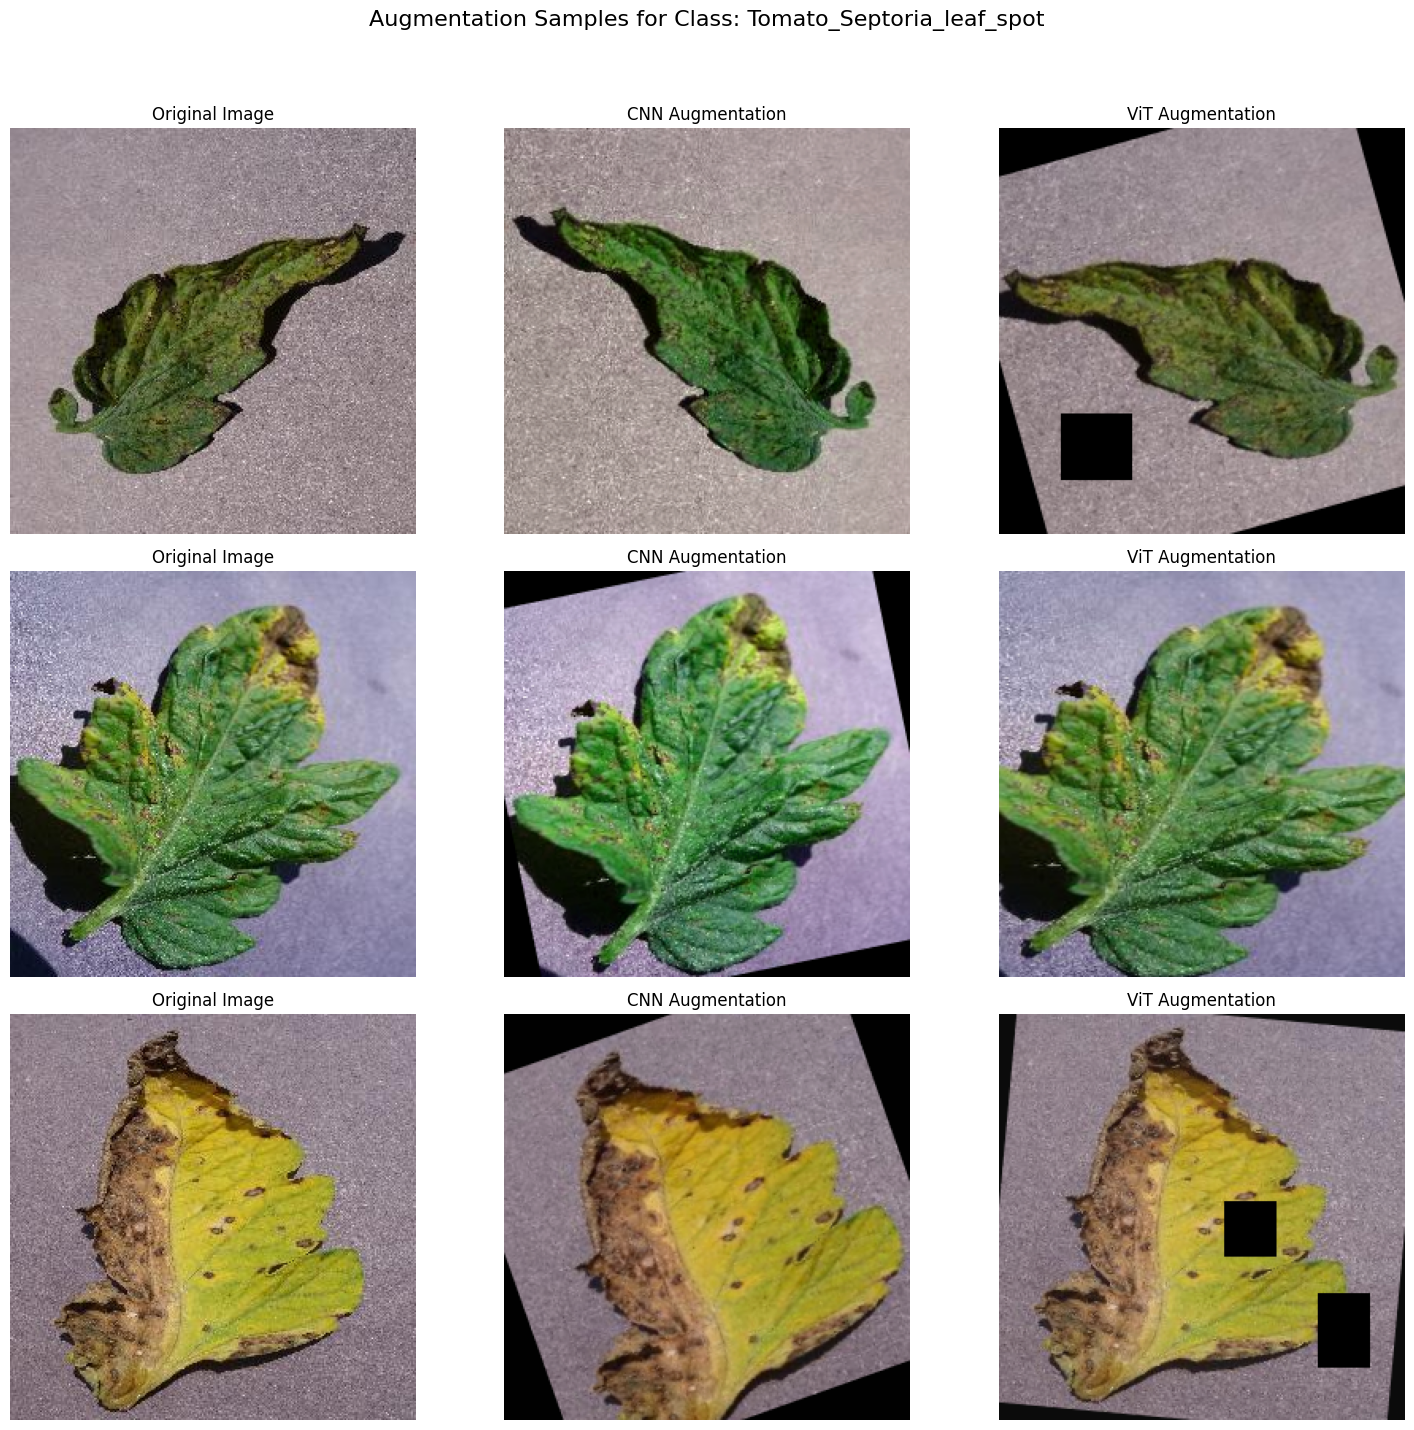

In [ ]:
# ==============================================================================
# SECTION 1: INITIAL CONFIGURATIONS AND MAIN VARIABLES
# ==============================================================================


# --- Configuration Variables ---

# Path to the original training dataset
INPUT_DIR = "/content/drive/MyDrive/tomato_leaf_dataset/train"

# Output paths for the augmented datasets on Google Drive
VIT_OUTPUT_DIR = "/content/drive/MyDrive/ViT_data"
CNN_OUTPUT_DIR = "/content/drive/MyDrive/CNN_data"

# Final number of images per class for each model
TARGET_PER_CLASS_VIT = 3000
TARGET_PER_CLASS_CNN = 1500

# Dictionary for class names (for display purposes)
CLASS_NAMES = {
    "0": "Tomato__Target_Spot",
    "1": "Tomato_Spider_mites_Two_spotted_spider_mite",
    "2": "Tomato_Bacterial_spot",
    "3": "Tomato_Late_blight",
    "4": "Tomato_Septoria_leaf_spot",
    "5": "Tomato_Leaf_Mold",
    "6": "Tomato_Early_blight",
    "7": "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "8": "Tomato_healthy",
    "9": "Tomato__Tomato_mosaic_virus"
}

# ==============================================================================
# SECTION 2: DEFINITION OF AUGMENTATION PIPELINES (CORRECTED)
# ==============================================================================

def get_vit_augmentations_final():
    """
    The final, optimized augmentation pipeline for ViT.
    CORRECTED: The 'size' parameter is now a tuple (height, width).
    """
    return A.Compose([
        A.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0), p=0.7),
        A.Rotate(limit=20, p=0.4),
        A.HorizontalFlip(p=0.4),
        A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, p=0.5),
        A.CoarseDropout(
            max_holes=8,
            max_height=25,
            max_width=25,
            p=0.5,
            fill_value=128
        ),
    ])

def get_cnn_augmentations():
    """
    Augmentation pipeline suitable for CNN models.
    CORRECTED: The 'size' parameter is now a tuple (height, width).
    """
    return A.Compose([
        A.RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0), p=0.7),
        A.Rotate(limit=20, p=0.4),
        A.HorizontalFlip(p=0.4),
        A.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1, p=0.5),
    ])

# ==============================================================================
# SECTION 3: MAIN FUNCTION FOR PROCESSING, AUGMENTING, AND SAVING DATA
# ==============================================================================

def process_and_augment_images(input_dir, output_dir, augmentation_pipeline, target_count):
    """
    Reads data from the input directory, augments it, and saves to the output directory.
    """
    print(f"--- Starting processing for output directory: {output_dir} ---")

    os.makedirs(output_dir, exist_ok=True)

    for class_dir_name in sorted(os.listdir(input_dir)):
        class_input_path = os.path.join(input_dir, class_dir_name)
        if not os.path.isdir(class_input_path): continue

        class_output_path = os.path.join(output_dir, class_dir_name)
        os.makedirs(class_output_path, exist_ok=True)

        original_image_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        num_original_images = len(original_image_files)

        for img_name in original_image_files:
            shutil.copy(os.path.join(class_input_path, img_name), os.path.join(class_output_path, img_name))

        num_to_generate = target_count - num_original_images
        class_display_name = CLASS_NAMES.get(class_dir_name, "Unknown Class")

        if num_to_generate <= 0:
            print(f"Class '{class_display_name}': Already has {num_original_images} images. No augmentation needed.")
            continue

        print(f"Class '{class_display_name}': Found {num_original_images} originals. Generating {num_to_generate} new images...")

        pbar = tqdm(range(num_to_generate), desc=f"Augmenting {class_display_name}")
        for i in pbar:
            random_image_name = random.choice(original_image_files)
            image_path = os.path.join(class_input_path, random_image_name)

            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            augmented_data = augmentation_pipeline(image=image)
            augmented_image = augmented_data['image']

            base_name, ext = os.path.splitext(random_image_name)
            new_filename = f"{base_name}_aug_{i}{ext}"

            augmented_image_bgr = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)
            cv2.imwrite(os.path.join(class_output_path, new_filename), augmented_image_bgr)

    print(f"--- Processing for {output_dir} completed successfully. ---")

# ==============================================================================
# SECTION 4: EXECUTION OF THE PROCESS
# ==============================================================================

# --- Create ViT Dataset ---
print("="*60)
print("GENERATING DATASET FOR VISION TRANSFORMER (ViT)")
print("="*60)
vit_aug_pipeline = get_vit_augmentations_final()
process_and_augment_images(INPUT_DIR, VIT_OUTPUT_DIR, vit_aug_pipeline, TARGET_PER_CLASS_VIT)

# --- Create CNN Dataset ---
print("\n" + "="*60)
print("GENERATING DATASET FOR CNN")
print("="*60)
cnn_aug_pipeline = get_cnn_augmentations()
process_and_augment_images(INPUT_DIR, CNN_OUTPUT_DIR, cnn_aug_pipeline, TARGET_PER_CLASS_CNN)

# ==============================================================================
# SECTION 5: VISUALIZATION OF RESULTS
# ==============================================================================

def visualize_augmentations(input_dir, cnn_pipeline, vit_pipeline, num_samples=3):
    """
    Displays a few samples of original images and their augmented versions.
    """
    class_folders = list(CLASS_NAMES.keys())
    random_class_folder = random.choice(class_folders)

    class_path = os.path.join(input_dir, random_class_folder)
    sample_images_names = random.sample(os.listdir(class_path), num_samples)

    class_display_name = CLASS_NAMES.get(random_class_folder, "Unknown Class")

    plt.figure(figsize=(15, 5 * num_samples))
    plt.suptitle(f"Augmentation Samples for Class: {class_display_name}", fontsize=16)

    for i, img_name in enumerate(sample_images_names):
        img_path = os.path.join(class_path, img_name)
        original_image = cv2.imread(img_path)
        if original_image is None:
            print(f"Warning: Could not read image {img_path} for visualization. Skipping.")
            continue
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

        # Apply augmentations for display
        cnn_augmented = cnn_pipeline(image=original_image)['image']
        vit_augmented = vit_pipeline(image=original_image)['image']

        # Display Original Image
        plt.subplot(num_samples, 3, i * 3 + 1)
        plt.imshow(original_image)
        plt.title("Original Image")
        plt.axis("off")

        # Display CNN-Augmented Version
        plt.subplot(num_samples, 3, i * 3 + 2)
        plt.imshow(cnn_augmented)
        plt.title("CNN Augmentation")
        plt.axis("off")

        # Display ViT-Augmented Version
        plt.subplot(num_samples, 3, i * 3 + 3)
        plt.imshow(vit_augmented)
        plt.title("ViT Augmentation")
        plt.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- Visualize the results after running the augmentation ---
print("\n" + "="*60)
print("VISUALIZING AUGMENTATION SAMPLES")
print("="*60)
vis_cnn_pipeline = get_cnn_augmentations()
vis_vit_pipeline = get_vit_augmentations_final()
visualize_augmentations(INPUT_DIR, vis_cnn_pipeline, vis_vit_pipeline)


--- Analyzing Directory: /content/drive/MyDrive/ViT_data ---


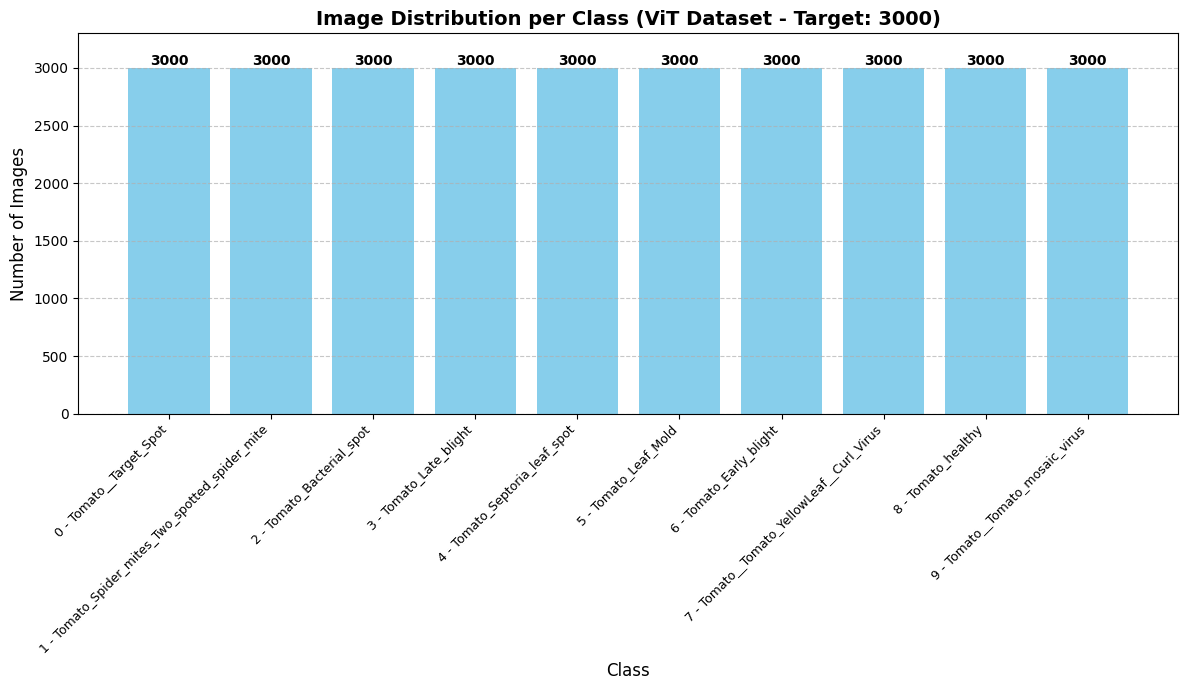

Total number of images in /content/drive/MyDrive/ViT_data: 30000

--- Analyzing Directory: /content/drive/MyDrive/CNN_data ---


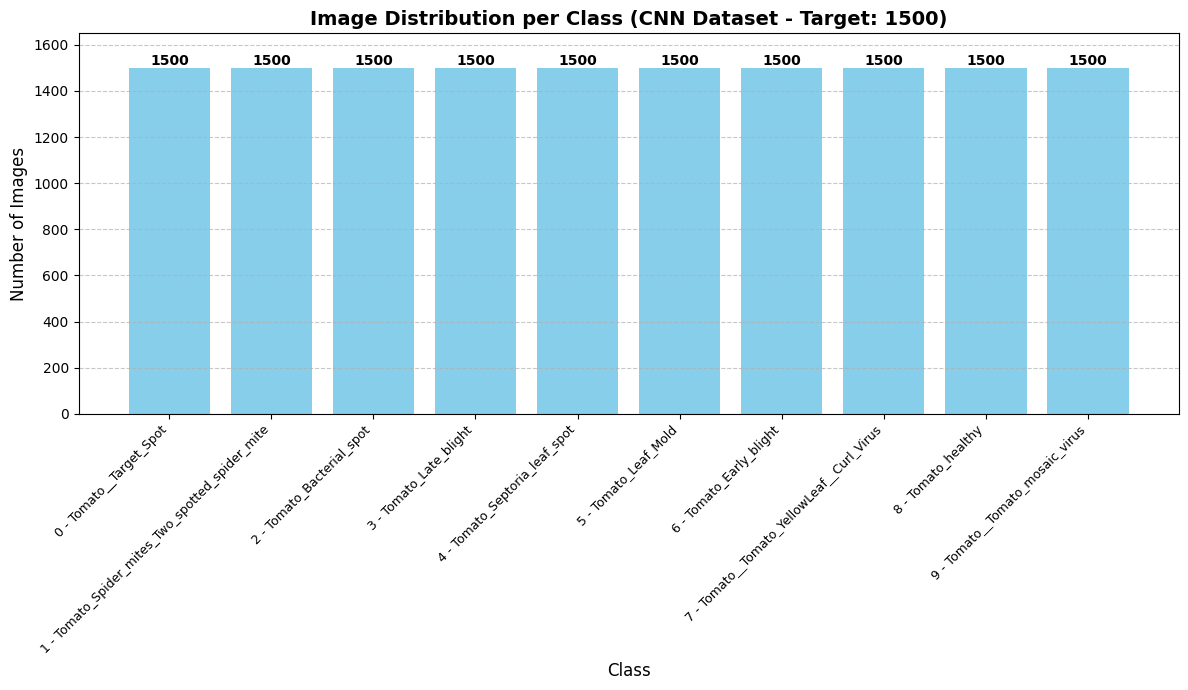

Total number of images in /content/drive/MyDrive/CNN_data: 15000


In [ ]:
# ==============================================================================
# SECTION 1: CONFIGURATIONS
# ==============================================================================

# Paths to the newly generated datasets
VIT_DATA_DIR = "/content/drive/MyDrive/ViT_data"
CNN_DATA_DIR = "/content/drive/MyDrive/CNN_data"

# Class label mapping (remains the same)
class_labels = {
    "0": "Tomato__Target_Spot",
    "1": "Tomato_Spider_mites_Two_spotted_spider_mite",
    "2": "Tomato_Bacterial_spot",
    "3": "Tomato_Late_blight",
    "4": "Tomato_Septoria_leaf_spot",
    "5": "Tomato_Leaf_Mold",
    "6": "Tomato_Early_blight",
    "7": "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "8": "Tomato_healthy",
    "9": "Tomato__Tomato_mosaic_virus"
}

# ==============================================================================
# SECTION 2: REUSABLE FUNCTION TO PLOT DATA DISTRIBUTION
# ==============================================================================

def plot_class_distribution(data_dir, title):
    """
    Counts the number of images in each class subfolder of a given directory
    and plots the distribution as a bar chart.
    """
    print(f"\n--- Analyzing Directory: {data_dir} ---")

    # Check if the directory exists
    if not os.path.exists(data_dir):
        print(f"Error: Directory not found at {data_dir}")
        return

    # Sorted list of class directories
    class_dirs = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

    # Count images per class
    class_counts = {class_id: len(os.listdir(os.path.join(data_dir, class_id))) for class_id in class_dirs}

    # Prepare data for plotting
    labels = [f"{cid} - {class_labels.get(cid, 'Unknown')}" for cid in class_counts.keys()]
    values = list(class_counts.values())

    # Plot bar chart
    plt.figure(figsize=(12, 7))
    bars = plt.bar(labels, values, color="skyblue")

    # Annotate each bar with its count
    for bar, value in zip(bars, values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(value),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    plt.xlabel("Class", fontsize=12)
    plt.ylabel("Number of Images", fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha="right", fontsize=9)
    plt.ylim(0, max(values) * 1.1)  # Add some space at the top
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Print total number of images
    total_images = sum(values)
    print(f"Total number of images in {data_dir}: {total_images}")

# ==============================================================================
# SECTION 3: EXECUTION FOR BOTH AUGMENTED DATASETS
# ==============================================================================

# Plot distribution for the ViT dataset
plot_class_distribution(
    data_dir=VIT_DATA_DIR,
    title="Image Distribution per Class (ViT Dataset - Target: 3000)"
)

# Plot distribution for the CNN dataset
plot_class_distribution(
    data_dir=CNN_DATA_DIR,
    title="Image Distribution per Class (CNN Dataset - Target: 1500)"
)

In [ ]:
# ==============================================================================
# SECTION 1: INITIAL CONFIGURATIONS AND MAIN VARIABLES
# ==============================================================================

# --- Configuration Variables ---

# Path to the original, high-resolution dataset
VIT_DATA_DIR = "/content/drive/MyDrive/ViT_data"
CNN_DATA_DIR = "/content/drive/MyDrive/CNN_data"

# --- Output Directory Paths ---
# Path for the CNN dataset (resized to 299x299)
CNN_OUTPUT_DIR = "/content/drive/MyDrive/CNN_data_299"
# Path for the ViT dataset (resized to 64x64)
VIT_OUTPUT_64_DIR = "/content/drive/MyDrive/ViT_data_64"
# Path for the ViT dataset (original 256x256 size)
VIT_OUTPUT_256_DIR = "/content/drive/MyDrive/ViT_data_256"


# ==============================================================================
# SECTION 2: MAIN FUNCTION TO CREATE PROCESSED DATASETS
# ==============================================================================

def create_processed_dataset(input_dir, output_dir, target_size=None, val_split=0.1):
    """
    Reads images from an input directory, optionally resizes them, performs a
    stratified train-validation split, and saves them to an output directory.

    Args:
        input_dir (str): Path to the source dataset.
        output_dir (str): Path to save the processed dataset.
        target_size (tuple, optional): The target (width, height) for resizing.
                                       If None, images are copied without resizing.
        val_split (float): The proportion of the dataset to include in the validation split.
    """
    print(f"--- Starting process for: {output_dir} ---")
    print(f"Target size: {'Original' if target_size is None else target_size}, Validation split: {val_split}")

    # Create base train and validation directories
    train_dir = os.path.join(output_dir, 'train')
    val_dir = os.path.join(output_dir, 'validation')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # Loop over each class directory to perform a stratified split
    for class_name in sorted(os.listdir(input_dir)):
        class_input_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_input_path):
            continue

        # Create corresponding class directories in train/val folders
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Get all image files for the current class
        all_files = [f for f in os.listdir(class_input_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        random.shuffle(all_files) # Shuffle for a random split

        # Calculate the split index
        split_index = int(len(all_files) * (1 - val_split))
        train_files = all_files[:split_index]
        val_files = all_files[split_index:]

        print(f"Class '{class_name}': {len(train_files)} train images, {len(val_files)} validation images.")

        # Process and save training images
        for filename in tqdm(train_files, desc=f"Processing Train-{class_name}"):
            src_path = os.path.join(class_input_path, filename)
            dst_path = os.path.join(train_dir, class_name, filename)

            if target_size: # Resize if target_size is provided
                image = cv2.imread(src_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                    cv2.imwrite(dst_path, resized_image)
            else: # Otherwise, just copy the file
                shutil.copy(src_path, dst_path)

        # Process and save validation images
        for filename in tqdm(val_files, desc=f"Processing Val-{class_name}"):
            src_path = os.path.join(class_input_path, filename)
            dst_path = os.path.join(val_dir, class_name, filename)

            if target_size: # Resize if target_size is provided
                image = cv2.imread(src_path)
                if image is not None:
                    resized_image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)
                    cv2.imwrite(dst_path, resized_image)
            else: # Otherwise, just copy the file
                shutil.copy(src_path, dst_path)

    print(f"--- Successfully created dataset at: {output_dir} ---")

# ==============================================================================
# SECTION 3: EXECUTION FOR ALL THREE DATASETS
# ==============================================================================

# --- 1. Create CNN Dataset (299x299) ---
create_processed_dataset(
    input_dir=CNN_DATA_DIR,
    output_dir=CNN_OUTPUT_DIR,
    target_size=(299, 299) # Resize to 299x299
)

# --- 2. Create ViT Dataset (64x64) ---
create_processed_dataset(
    input_dir=VIT_DATA_DIR,
    output_dir=VIT_OUTPUT_64_DIR,
    target_size=(64, 64) # Resize to 64x64
)

# --- 3. Create ViT Dataset (256x256) ---
create_processed_dataset(
    input_dir=VIT_DATA_DIR,
    output_dir=VIT_OUTPUT_256_DIR,
    target_size=None # Copy original files without resizing
)

--- Starting process for: /content/drive/MyDrive/CNN_data_299 ---
Target size: (299, 299), Validation split: 0.1
Class '0': 1350 train images, 150 validation images.


Processing Val-0: 100%|██████████| 150/150 [00:04<00:00, 30.45it/s]


Class '1': 1350 train images, 150 validation images.


Processing Val-1: 100%|██████████| 150/150 [00:04<00:00, 32.15it/s]


Class '2': 1350 train images, 150 validation images.


Processing Val-2: 100%|██████████| 150/150 [00:04<00:00, 36.28it/s]


Class '3': 1350 train images, 150 validation images.


Processing Val-3: 100%|██████████| 150/150 [00:04<00:00, 35.23it/s]


Class '4': 1350 train images, 150 validation images.


Processing Val-4: 100%|██████████| 150/150 [00:04<00:00, 36.39it/s]


Class '5': 1350 train images, 150 validation images.


Processing Val-5: 100%|██████████| 150/150 [00:04<00:00, 33.38it/s]


Class '6': 1350 train images, 150 validation images.


Processing Val-6: 100%|██████████| 150/150 [00:04<00:00, 32.14it/s]


Class '7': 1350 train images, 150 validation images.


Processing Val-7: 100%|██████████| 150/150 [00:04<00:00, 32.12it/s]


Class '8': 1350 train images, 150 validation images.


Processing Val-8: 100%|██████████| 150/150 [00:04<00:00, 33.08it/s]


Class '9': 1350 train images, 150 validation images.


Processing Val-9: 100%|██████████| 150/150 [00:04<00:00, 34.97it/s]


--- Successfully created dataset at: /content/drive/MyDrive/CNN_data_299 ---
--- Starting process for: /content/drive/MyDrive/ViT_data_64 ---
Target size: (64, 64), Validation split: 0.1
Class '0': 2700 train images, 300 validation images.


Processing Val-0: 100%|██████████| 300/300 [00:10<00:00, 29.63it/s]


Class '1': 2700 train images, 300 validation images.


Processing Val-1: 100%|██████████| 300/300 [00:09<00:00, 33.23it/s]


Class '2': 2700 train images, 300 validation images.


Processing Val-2: 100%|██████████| 300/300 [00:09<00:00, 30.07it/s]


Class '3': 2700 train images, 300 validation images.


Processing Val-3: 100%|██████████| 300/300 [00:10<00:00, 29.16it/s]


Class '4': 2700 train images, 300 validation images.


Processing Val-4: 100%|██████████| 300/300 [00:09<00:00, 31.32it/s]


Class '5': 2700 train images, 300 validation images.


Processing Val-5: 100%|██████████| 300/300 [00:09<00:00, 32.57it/s]


Class '6': 2700 train images, 300 validation images.


Processing Val-6: 100%|██████████| 300/300 [00:10<00:00, 28.23it/s]


Class '7': 2700 train images, 300 validation images.


Processing Val-7: 100%|██████████| 300/300 [00:11<00:00, 26.41it/s]


Class '8': 2700 train images, 300 validation images.


Processing Val-8: 100%|██████████| 300/300 [00:12<00:00, 24.12it/s]


Class '9': 2700 train images, 300 validation images.


Processing Val-9: 100%|██████████| 300/300 [00:08<00:00, 37.09it/s]


--- Successfully created dataset at: /content/drive/MyDrive/ViT_data_64 ---
--- Starting process for: /content/drive/MyDrive/ViT_data_256 ---
Target size: Original, Validation split: 0.1
Class '0': 2700 train images, 300 validation images.


Processing Val-0: 100%|██████████| 300/300 [00:07<00:00, 37.51it/s]


Class '1': 2700 train images, 300 validation images.


Processing Val-1: 100%|██████████| 300/300 [00:07<00:00, 38.57it/s]


Class '2': 2700 train images, 300 validation images.


Processing Val-2: 100%|██████████| 300/300 [00:06<00:00, 46.01it/s]


Class '3': 2700 train images, 300 validation images.


Processing Val-3: 100%|██████████| 300/300 [00:06<00:00, 46.62it/s]


Class '4': 2700 train images, 300 validation images.


Processing Val-4: 100%|██████████| 300/300 [00:08<00:00, 35.71it/s]


Class '5': 2700 train images, 300 validation images.


Processing Val-5: 100%|██████████| 300/300 [00:07<00:00, 41.79it/s]


Class '6': 2700 train images, 300 validation images.


Processing Val-6: 100%|██████████| 300/300 [00:07<00:00, 37.70it/s]


Class '7': 2700 train images, 300 validation images.


Processing Val-7: 100%|██████████| 300/300 [00:07<00:00, 40.71it/s]


Class '8': 2700 train images, 300 validation images.


Processing Val-8: 100%|██████████| 300/300 [00:07<00:00, 38.94it/s]


Class '9': 2700 train images, 300 validation images.


Processing Val-9: 100%|██████████| 300/300 [00:09<00:00, 33.19it/s]

--- Successfully created dataset at: /content/drive/MyDrive/ViT_data_256 ---


### CNN model training

In [ ]:
# ==============================================================================
# SECTION 1:  CONFIGURATIONS
# ==============================================================================

# --- Main Configuration Parameters ---
DATA_DIR = "/content/drive/MyDrive/CNN_data_299"
INPUT_SHAPE = (299, 299, 3)
NUM_CLASSES = 10
MAX_EPOCHS = 30
BATCH_SIZE = 128
INITIAL_LEARNING_RATE = 0.001
EARLY_STOP_PATIENCE = 10
LR_PLATEAU_PATIENCE = 5
LR_PLATEAU_FACTOR = 0.5
MIN_LEARNING_RATE = 0.00001
MODEL_CHECKPOINT_PATH = "/content/drive/MyDrive/inceptionv3_from_scratch_best.keras"


# SECTION 2: (REMOVED) The custom TrainingMonitor callback has been removed for simplicity and reliability.


# ==============================================================================
# SECTION 3: DATA LOADING PIPELINE
# ==============================================================================

print("Creating data generators...")
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(DATA_DIR, 'train'),
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(INPUT_SHAPE[0], INPUT_SHAPE[1])
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(DATA_DIR, 'validation'),
    labels='inferred',
    label_mode='categorical',
    batch_size=BATCH_SIZE,
    image_size=(INPUT_SHAPE[0], INPUT_SHAPE[1])
)

def preprocess_data(image, label):
    return tf.keras.applications.inception_v3.preprocess_input(image), label

print("Optimizing data pipelines...")
train_ds = train_dataset.map(preprocess_data).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = validation_dataset.map(preprocess_data).prefetch(buffer_size=tf.data.AUTOTUNE)

# ==============================================================================
# SECTION 4: MODEL DEFINITION
# ==============================================================================

def build_inceptionv3_from_scratch(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    base_model = InceptionV3(include_top=False, weights=None, input_shape=input_shape)
    x = base_model(inputs)
    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dense(512, activation='relu', name='dense_hidden')(x)
    x = Dropout(0.5, name='dropout')(x)
    outputs = Dense(num_classes, activation='softmax', name='predictions')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

print("Building the InceptionV3 model from scratch...")
model = build_inceptionv3_from_scratch(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)

print("Compiling the model...")
model.compile(
    optimizer=Adam(learning_rate=INITIAL_LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ==============================================================================
# SECTION 5: SETTING UP CALLBACKS AND TRAINING
# ==============================================================================
print("Setting up callbacks...")

# Callback to save the best model based on validation loss
# The `verbose=1` will print a message when the model is saved.
model_checkpoint = ModelCheckpoint(
    filepath=MODEL_CHECKPOINT_PATH,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Callback for early stopping
# The `verbose=1` will print a message when training is stopped.
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=EARLY_STOP_PATIENCE,
    verbose=1,
    restore_best_weights=True
)

# Callback to reduce learning rate on plateau
# The `verbose=1` will print a message when the learning rate is reduced.
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=LR_PLATEAU_FACTOR,
    patience=LR_PLATEAU_PATIENCE,
    min_lr=MIN_LEARNING_RATE,
    verbose=1
)

# --- Start Training ---
print("\n" + "="*60)
print("STARTING MODEL TRAINING")
print("="*60)

history = model.fit(
    train_ds,
    epochs=MAX_EPOCHS,
    validation_data=val_ds,
    # The custom callback is removed. The standard callbacks will provide logs.
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)

print("\n" + "="*60)
print("TRAINING FINISHED")
print("="*60)

Creating data generators...
Found 13500 files belonging to 10 classes.
Found 1500 files belonging to 10 classes.
Optimizing data pipelines...
Building the InceptionV3 model from scratch...
Compiling the model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_hidden (Dense)            │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,857,002 (87.19 MB)

 Trainable params: 22,822,570 (87.06 MB)

 Non-trainable params: 34,432 (134.50 KB)

Setting up callbacks...

STARTING MODEL TRAINING
Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.4832 - loss: 1.5834 
Epoch 1: val_loss improved from inf to 417.64359, saving model to /content/drive/MyDrive/inceptionv3_from_scratch_best.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 2163s 19s/step - accuracy: 0.4844 - loss: 1.5796 - val_accuracy: 0.1000 - val_loss: 417.6436 - learning_rate: 0.0010
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7899 - loss: 0.6615
Epoch 2: val_loss improved from 417.64359 to 7.23514, saving model to /content/drive/MyDrive/inceptionv3_from_scratch_best.keras
106/106 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.7899 - loss: 0.6613 - val_accuracy: 0.1333 - val_loss: 7.2351 - learning_rate: 0.0010
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8362 - loss: 0.5218
Epoch 3: val_loss did not improve from 7.23514
106/106 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.8362 - loss: 0.5218 - val_accuracy: 0.3287 - val_


PLOTTING TRAINING & VALIDATION CURVES


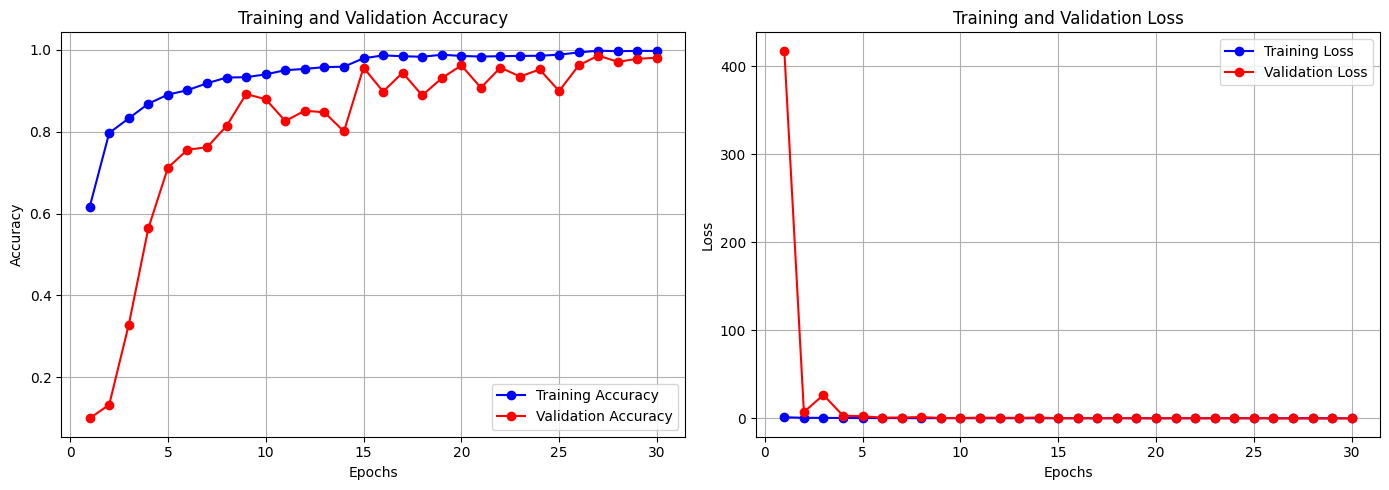


EVALUATING MODEL ON VALIDATION DATA
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.9868 - loss: 0.0378

Final Validation Loss: 0.0544
Final Validation Accuracy: 0.9860

GENERATING CLASSIFICATION REPORT & CONFUSION MATRIX
Classification Report:

                                             precision    recall  f1-score   support

                        Tomato__Target_Spot       0.99      0.95      0.97       150
Tomato_Spider_mites_Two_spotted_spider_mite       0.97      1.00      0.98       150
                      Tomato_Bacterial_spot       0.99      0.99      0.99       150
                         Tomato_Late_blight       0.99      0.97      0.98       150
                  Tomato_Septoria_leaf_spot       0.98      0.99      0.99       150
                           Tomato_Leaf_Mold       0.99      0.97      0.98       150
                        Tomato_Early_blight       0.97      0.99      0.98       150
      Tomato__Tomato_YellowLeaf__Curl_Virus       1.00      0.99 

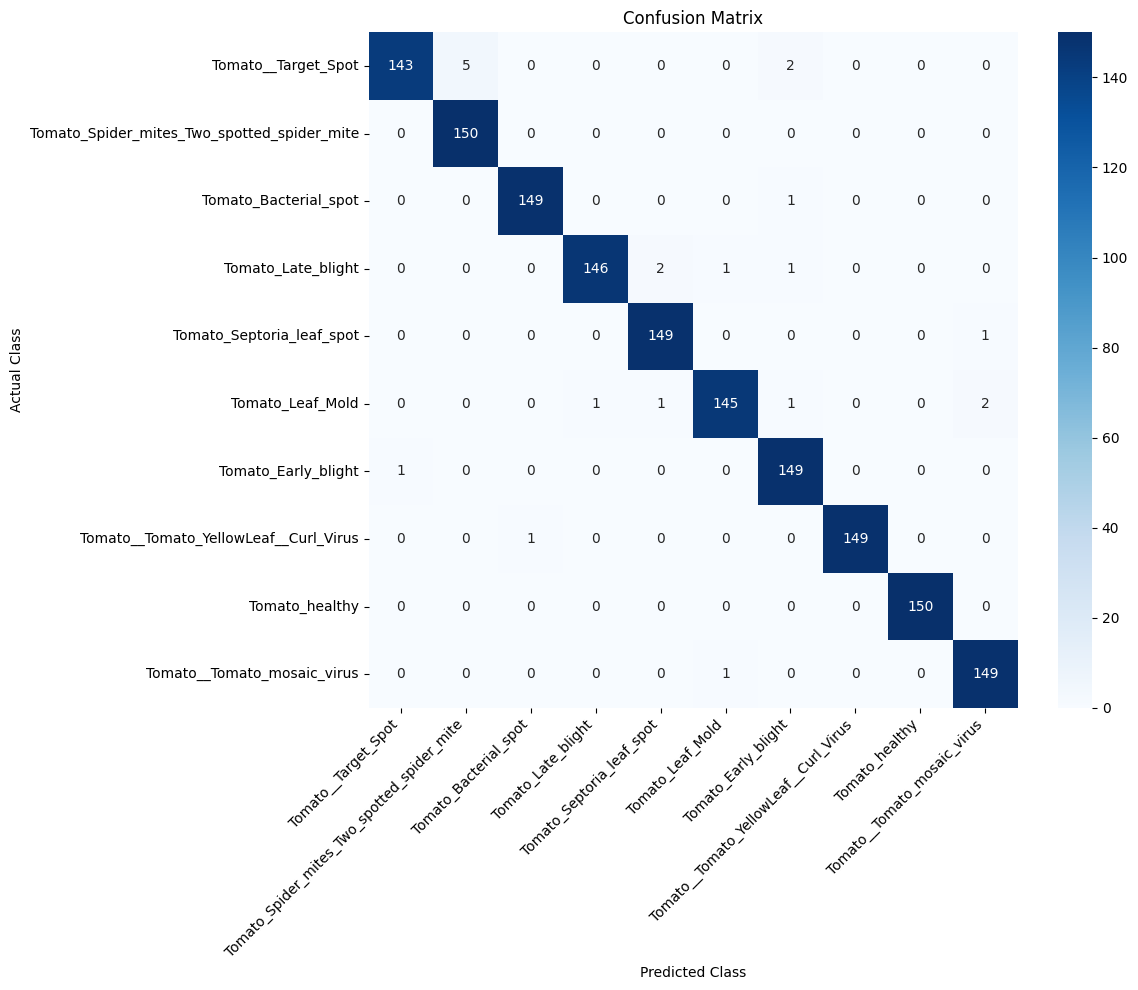

In [ ]:
# ==============================================================================
# SECTION 6: VISUALIZING TRAINING HISTORY AND EVALUATING THE MODEL
# ==============================================================================

CLASS_NAMES = {
    "0": "Tomato__Target_Spot",
    "1": "Tomato_Spider_mites_Two_spotted_spider_mite",
    "2": "Tomato_Bacterial_spot",
    "3": "Tomato_Late_blight",
    "4": "Tomato_Septoria_leaf_spot",
    "5": "Tomato_Leaf_Mold",
    "6": "Tomato_Early_blight",
    "7": "Tomato__Tomato_YellowLeaf__Curl_Virus",
    "8": "Tomato_healthy",
    "9": "Tomato__Tomato_mosaic_virus"
}

# --- Function to plot training history ---
def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss curves.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# --- 1. Plot the learning curves ---
print("\n" + "="*60)
print("PLOTTING TRAINING & VALIDATION CURVES")
print("="*60)
plot_training_history(history)


# --- 2. Evaluate the model on the entire validation set ---
print("\n" + "="*60)
print("EVALUATING MODEL ON VALIDATION DATA")
print("="*60)
final_loss, final_accuracy = model.evaluate(val_ds, verbose=1)
print(f"\nFinal Validation Loss: {final_loss:.4f}")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")


# --- 3. Generate Classification Report and Confusion Matrix ---
print("\n" + "="*60)
print("GENERATING CLASSIFICATION REPORT & CONFUSION MATRIX")
print("="*60)

# To generate the report, we need to get all predictions and true labels
y_pred = []
y_true = []

# Iterate over the validation dataset to get true labels and predictions
for images, labels in val_ds:
    # Get true labels
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    # Get model predictions (probabilities)
    preds = model.predict_on_batch(images)
    # Get the class with the highest probability
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Get class names from the generator
class_names = train_dataset.class_names
# Map class names using the main CLASS_NAMES dictionary for better readability
readable_class_names = [CLASS_NAMES[cn] for cn in class_names]

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=readable_class_names))


# Plot Confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=readable_class_names,
            yticklabels=readable_class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### ViT model training

In [9]:
!mkdir -p /content/local_datasets

print("Copying ViT_data_256...")
!cp -r "/content/drive/MyDrive/ViT_data_256" "/content/local_datasets/ViT_data_256"

print("Copying ViT_data_64...")
!cp -r "/content/drive/MyDrive/ViT_data_64" "/content/local_datasets/ViT_data_64"

print("Copying finished!")

Copying ViT_data_256...
Copying ViT_data_64...
Copying finished!



STARTING EXPERIMENT FOR: LightViT_Custom_256x256
Loading data...
Found 27000 files belonging to 10 classes.
Found classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Found 3000 files belonging to 10 classes.
Building model...


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ overlapping_patches             │ (None, None, 3072)     │             0 │
│ (OverlappingPatches)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_position_encoder      │ (None, 100, 64)        │       203,072 │
│ (PatchAndPositionEncoder)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block       │ (None, 100, 64)        │        83,200 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_2           │ (None, 100, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │    13,109,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,504,074 (59.14 MB)

 Trainable params: 15,504,074 (59.14 MB)

 Non-trainable params: 0 (0.00 B)


Starting custom training loop...

Epoch 1/50
Time: 64.25s - loss: 2.9452 - accuracy: 0.1007 - val_loss: 2.2852 - val_accuracy: 0.1077
Validation loss improved from inf to 2.2852. Saving model weights...

Epoch 2/50
Time: 87.03s - loss: 2.2820 - accuracy: 0.1109 - val_loss: 2.2849 - val_accuracy: 0.1077
Validation loss improved from 2.2852 to 2.2849. Saving model weights...

Epoch 3/50
Time: 87.04s - loss: 2.2831 - accuracy: 0.1096 - val_loss: 2.2408 - val_accuracy: 0.1457
Validation loss improved from 2.2849 to 2.2408. Saving model weights...

Epoch 4/50
Time: 87.04s - loss: 2.2615 - accuracy: 0.1258 - val_loss: 2.2854 - val_accuracy: 0.1083
Validation loss did not improve from 2.2408.

Epoch 5/50
Time: 84.06s - loss: 2.2463 - accuracy: 0.1351 - val_loss: 2.1972 - val_accuracy: 0.1793
Validation loss improved from 2.2408 to 2.1972. Saving model weights...

Epoch 6/50
Time: 47.74s - loss: 2.2122 - accuracy: 0.1534 - val_loss: 2.1057 - val_accuracy: 0.2217
Validation loss improved from 

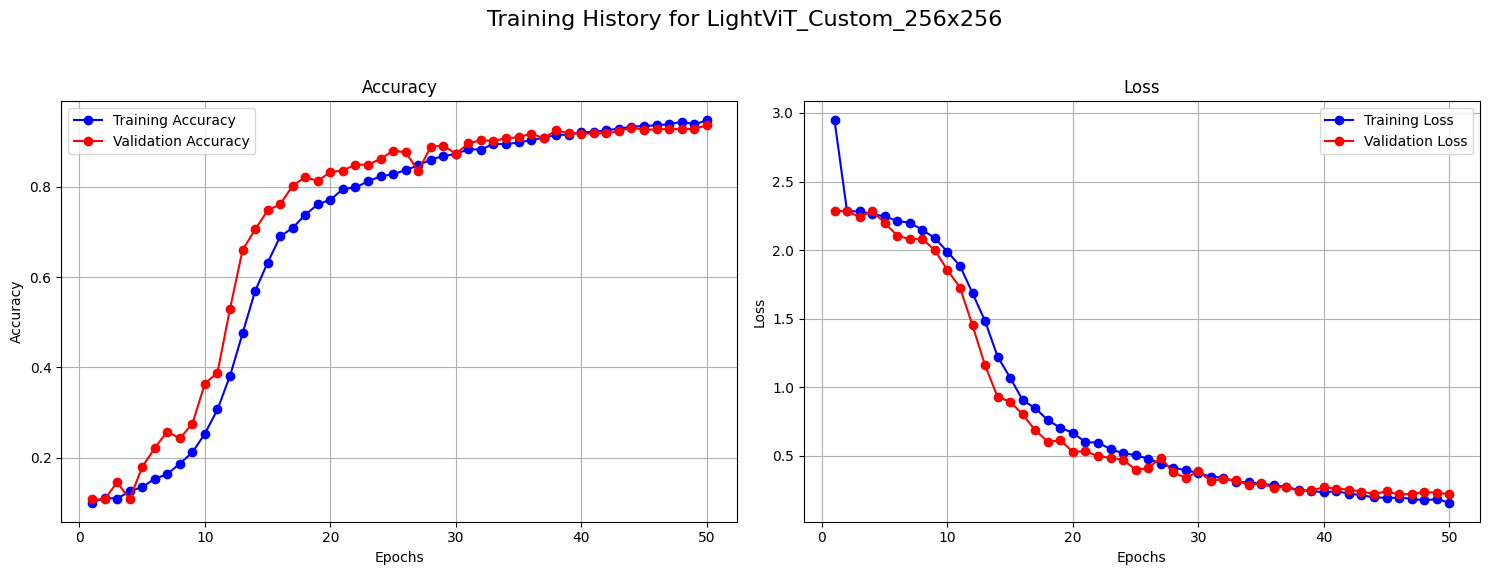


--- Evaluating LightViT_Custom_256x256 ---

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       300
           1       0.91      0.92      0.92       300
           2       0.95      0.92      0.94       300
           3       0.92      0.93      0.93       300
           4       0.92      0.92      0.92       300
           5       0.94      0.92      0.93       300
           6       0.96      0.82      0.88       300
           7       0.95      0.98      0.97       300
           8       0.96      0.97      0.97       300
           9       0.91      0.99      0.95       300

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



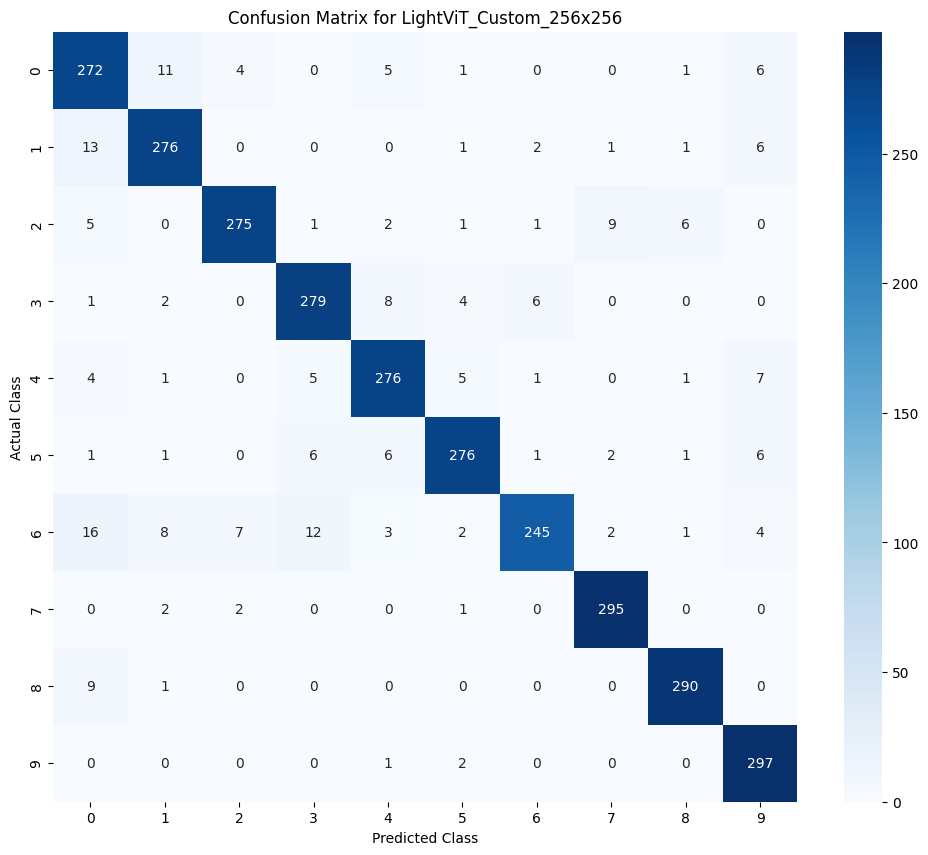

--- EXPERIMENT FOR LightViT_Custom_256x256 FINISHED ---


In [ ]:
# ==============================================================================
# SECTION 1: = CONFIGURATIONS
# ==============================================================================

# --- Common Training Hyperparameters ---
COMMON_CONFIG = {
    "NUM_CLASSES": 10,
    "MAX_EPOCHS": 50,
    "BATCH_SIZE": 256, # CORRECTED: Changed to a more reasonable value to prevent OOM errors
    "INITIAL_LEARNING_RATE": 0.001,
    "EARLY_STOP_PATIENCE": 10,
    "LR_PLATEAU_PATIENCE": 5,
    "LR_PLATEAU_FACTOR": 0.5,
    "MIN_LEARNING_RATE": 0.00001
}

# --- Model-Specific Configurations ---
LIGHTWEIGHT_VIT_CONFIG = {
    "num_heads": 4, "hidden_size": 64,
    "num_encoder_blocks": 1, "mlp_dim": 128,
    "dropout_rate": 0.1
}

VIT_256_CONFIG = {
    "model_name": "LightViT_Custom_256x256",
    "data_dir": "/content/local_datasets/ViT_data_256",
    "input_shape": (256, 256, 3),
    "patch_size": 32, "stride": 24,
    "checkpoint_path": "/content/drive/MyDrive/light_vit_custom_256_best.weights.h5",
    **LIGHTWEIGHT_VIT_CONFIG
}

VIT_64_CONFIG = {
    "model_name": "LightViT_Custom_64x64",
    "data_dir": "/content/local_datasets/ViT_data_64",
    "input_shape": (64, 64, 3),
    "patch_size": 8, "stride": 6,
    "checkpoint_path": "/content/drive/MyDrive/light_vit_custom_64_best.weights.h5",
    **LIGHTWEIGHT_VIT_CONFIG
}


# ==============================================================================
# SECTION 2: CUSTOM ViT BUILDING BLOCKS
# ==============================================================================
class OverlappingPatches(layers.Layer):
    def __init__(self, patch_size, stride, **kwargs):
        super(OverlappingPatches, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.stride = stride
    def call(self, images):
        batch_size = tf.shape(images)[0]
        images = tf.cast(images, tf.float32)
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.stride, self.stride, 1],
            rates=[1, 1, 1, 1], padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchAndPositionEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super(PatchAndPositionEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection = layers.Dense(units=embed_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=embed_dim
        )
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

class TransformerEncoderBlock(layers.Layer):
    def __init__(self, num_heads, hidden_size, mlp_dim, dropout_rate, **kwargs):
        super(TransformerEncoderBlock, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.hidden_size = hidden_size
        self.mlp_dim = mlp_dim
        self.dropout_rate = dropout_rate
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.attention = layers.MultiHeadAttention(
            num_heads=self.num_heads, key_dim=self.hidden_size, dropout=self.dropout_rate
        )
        self.add1 = layers.Add()
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dense1 = layers.Dense(self.mlp_dim, activation=tf.nn.gelu)
        self.dropout1 = layers.Dropout(self.dropout_rate)
        self.dense2 = layers.Dense(self.hidden_size)
        self.dropout2 = layers.Dropout(self.dropout_rate)
        self.add2 = layers.Add()
    def call(self, inputs, training=False):
        x1_norm = self.norm1(inputs)
        attention_output = self.attention(query=x1_norm, value=x1_norm, key=x1_norm, training=training)
        x1_res = self.add1([inputs, attention_output])
        x2_norm = self.norm2(x1_res)
        x2_mlp = self.dense1(x2_norm)
        x2_mlp = self.dropout1(x2_mlp, training=training)
        x2_mlp = self.dense2(x2_mlp)
        x2_mlp = self.dropout2(x2_mlp, training=training)
        x2_res = self.add2([x1_res, x2_mlp])
        return x2_res

# ==============================================================================
# SECTION 3: MAIN MODEL BUILDER AND HELPER FUNCTIONS
# ==============================================================================

def build_lightweight_vit(config):
    input_shape = config["input_shape"]
    patch_size = config["patch_size"]
    stride = config["stride"]
    num_heads = config["num_heads"]
    hidden_size = config["hidden_size"]
    num_encoder_blocks = config["num_encoder_blocks"]
    mlp_dim = config["mlp_dim"]
    dropout_rate = config["dropout_rate"]
    num_classes = COMMON_CONFIG["NUM_CLASSES"]

    num_patches_h = (input_shape[0] - patch_size) // stride + 1
    num_patches_w = (input_shape[1] - patch_size) // stride + 1
    num_patches = num_patches_h * num_patches_w

    inputs = layers.Input(shape=input_shape)
    # The Rescaling layer is removed from here and placed in the data pipeline
    patches = OverlappingPatches(patch_size, stride)(inputs)
    encoded_patches = PatchAndPositionEncoder(num_patches, hidden_size)(patches)
    x = encoded_patches
    for _ in range(num_encoder_blocks):
        x = TransformerEncoderBlock(num_heads, hidden_size, mlp_dim, dropout_rate)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(2048, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

def plot_training_history(history, model_name):
    acc = history.get('accuracy', [])
    val_acc = history.get('val_accuracy', [])
    loss = history.get('loss', [])
    val_loss = history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)
    if not acc:
        print("No history to plot, training might have been interrupted.")
        return
    plt.figure(figsize=(15, 6))
    plt.suptitle(f"Training History for {model_name}", fontsize=16)
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
    plt.title('Accuracy'); plt.xlabel('Epochs'); plt.ylabel('Accuracy')
    plt.legend(); plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Loss'); plt.xlabel('Epochs'); plt.ylabel('Loss')
    plt.legend(); plt.grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def evaluate_model(model, validation_dataset, model_name, class_names): # CORRECTED: Added class_names argument
    print(f"\n--- Evaluating {model_name} ---")
    y_pred_probs = []
    y_true = []
    for images, labels in validation_dataset:
        y_true.extend(labels.numpy())
        preds = model.predict_on_batch(images)
        y_pred_probs.extend(preds)
    y_true = np.array(y_true)
    y_pred = np.argmax(np.array(y_pred_probs), axis=1)
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual Class'); plt.xlabel('Predicted Class')
    plt.show()

# ==============================================================================
# SECTION 4: MAIN EXPERIMENT RUNNER
# ==============================================================================

def run_experiment(model_config):
    model_name = model_config["model_name"]
    data_dir = model_config["data_dir"]
    input_shape = model_config["input_shape"]

    print("\n" + "="*80)
    print(f"STARTING EXPERIMENT FOR: {model_name}")
    print("="*80)

    # 1. Load Data
    print("Loading data...")
    def preprocess_data(image, label):
        return tf.cast(image, tf.float32) / 255.0, label

    try:
        # CORRECTED: Create a temporary dataset to get class names first
        temp_ds = tf.keras.utils.image_dataset_from_directory(
            directory=os.path.join(data_dir, 'train'), labels='inferred', label_mode='int',
            batch_size=COMMON_CONFIG["BATCH_SIZE"], image_size=(input_shape[0], input_shape[1])
        )
        class_names = temp_ds.class_names
        print(f"Found classes: {class_names}")

        # Now create the final optimized datasets using the temp dataset
        train_ds = temp_ds.map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(buffer_size=tf.data.AUTOTUNE)
        val_ds = tf.keras.utils.image_dataset_from_directory(
            directory=os.path.join(data_dir, 'validation'), labels='inferred',
            label_mode='int', batch_size=COMMON_CONFIG["BATCH_SIZE"],
            image_size=(input_shape[0], input_shape[1])
        ).map(preprocess_data, num_parallel_calls=tf.data.AUTOTUNE).prefetch(buffer_size=tf.data.AUTOTUNE)
    except Exception as e:
        print(f"Error loading data for {model_name}. Error: {e}")
        return

    # 2. Build Model and setup training components
    print("Building model...")
    model = build_lightweight_vit(model_config)
    model.summary()

    optimizer = Adam(learning_rate=COMMON_CONFIG["INITIAL_LEARNING_RATE"])
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
    val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

    # --- Custom Loop Variables ---
    best_val_loss = float("inf")
    early_stop_counter = 0
    lr_plateau_counter = 0
    history = {"loss": [], "accuracy": [], "val_loss": [], "val_accuracy": []}

    # 3. Custom Training Loop
    print("\nStarting custom training loop...")
    for epoch in range(COMMON_CONFIG["MAX_EPOCHS"]):
        print(f"\nEpoch {epoch + 1}/{COMMON_CONFIG['MAX_EPOCHS']}")
        start_time = time.time()

        train_acc_metric.reset_state()
        val_acc_metric.reset_state()
        batch_losses = []

        for step, (x_batch_train, y_batch_train) in enumerate(train_ds):
            with tf.GradientTape() as tape:
                predictions = model(x_batch_train, training=True)
                loss_value = loss_fn(y_batch_train, predictions)
            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            train_acc_metric.update_state(y_batch_train, predictions)
            batch_losses.append(loss_value.numpy())

        train_acc = train_acc_metric.result()
        epoch_loss = np.mean(batch_losses)
        history["accuracy"].append(train_acc.numpy())
        history["loss"].append(epoch_loss)

        val_loss_agg = []
        for x_batch_val, y_batch_val in val_ds:
            val_predictions = model(x_batch_val, training=False)
            val_loss_value = loss_fn(y_batch_val, val_predictions)
            val_loss_agg.append(val_loss_value.numpy())
            val_acc_metric.update_state(y_batch_val, val_predictions)

        val_acc = val_acc_metric.result()
        val_loss = np.mean(val_loss_agg)
        history["val_accuracy"].append(val_acc.numpy())
        history["val_loss"].append(val_loss)

        print(f"Time: {time.time() - start_time:.2f}s - loss: {epoch_loss:.4f} - accuracy: {train_acc.numpy():.4f} - val_loss: {val_loss:.4f} - val_accuracy: {val_acc.numpy():.4f}")

        if val_loss < best_val_loss:
            print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model weights...")
            best_val_loss = val_loss
            model.save_weights(model_config["checkpoint_path"])
            lr_plateau_counter = 0
            early_stop_counter = 0
        else:
            print(f"Validation loss did not improve from {best_val_loss:.4f}.")
            lr_plateau_counter += 1
            early_stop_counter += 1

        if lr_plateau_counter >= COMMON_CONFIG["LR_PLATEAU_PATIENCE"]:
            current_lr = optimizer.learning_rate.numpy()
            new_lr = current_lr * COMMON_CONFIG["LR_PLATEAU_FACTOR"]
            if new_lr >= COMMON_CONFIG["MIN_LEARNING_RATE"]:
                print(f"Reducing learning rate from {current_lr} to {new_lr}")
                optimizer.learning_rate.assign(new_lr)
            lr_plateau_counter = 0

        if early_stop_counter >= COMMON_CONFIG["EARLY_STOP_PATIENCE"]:
            print("Early stopping triggered.")
            break

    # 4. Plot and Evaluate
    print("\nTraining finished. Loading best weights for final evaluation...")
    model.load_weights(model_config["checkpoint_path"])

    # CORRECTED: Passing the history dictionary directly
    plot_training_history(history, model_name)
    # CORRECTED: Passing the stored class_names list
    evaluate_model(model, val_ds, model_name, class_names=class_names)

    print(f"--- EXPERIMENT FOR {model_name} FINISHED ---")

# ==============================================================================
# SECTION 5: RUN ALL EXPERIMENTS
# ==============================================================================

#all_configs = [VIT_256_CONFIG,VIT_64_CONFIG ]
run_experiment(VIT_256_CONFIG)


STARTING EXPERIMENT FOR: LightViT_Custom_64x64
Loading data...
Found 27000 files belonging to 10 classes.
Found classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Found 3000 files belonging to 10 classes.
Building model...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ overlapping_patches_1           │ (None, None, 192)      │             0 │
│ (OverlappingPatches)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ patch_and_position_encoder_1    │ (None, 100, 64)        │        18,752 │
│ (PatchAndPositionEncoder)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_block_1     │ (None, 100, 64)        │        83,200 │
│ (TransformerEncoderBlock)       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ (None, 100, 64)        │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2048)           │    13,109,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,319,754 (58.44 MB)

 Trainable params: 15,319,754 (58.44 MB)

 Non-trainable params: 0 (0.00 B)


Starting custom training loop...

Epoch 1/50
Time: 42.06s - loss: 2.6397 - accuracy: 0.1349 - val_loss: 2.0664 - val_accuracy: 0.2523
Validation loss improved from inf to 2.0664. Saving model weights...

Epoch 2/50
Time: 29.84s - loss: 1.9313 - accuracy: 0.2900 - val_loss: 1.5348 - val_accuracy: 0.4563
Validation loss improved from 2.0664 to 1.5348. Saving model weights...

Epoch 3/50
Time: 29.92s - loss: 1.5122 - accuracy: 0.4573 - val_loss: 1.1165 - val_accuracy: 0.6427
Validation loss improved from 1.5348 to 1.1165. Saving model weights...

Epoch 4/50
Time: 30.69s - loss: 1.1903 - accuracy: 0.5817 - val_loss: 0.8598 - val_accuracy: 0.7153
Validation loss improved from 1.1165 to 0.8598. Saving model weights...

Epoch 5/50
Time: 41.61s - loss: 0.9324 - accuracy: 0.6766 - val_loss: 0.7731 - val_accuracy: 0.7433
Validation loss improved from 0.8598 to 0.7731. Saving model weights...

Epoch 6/50
Time: 31.21s - loss: 0.8057 - accuracy: 0.7252 - val_loss: 0.6491 - val_accuracy: 0.7847
Val

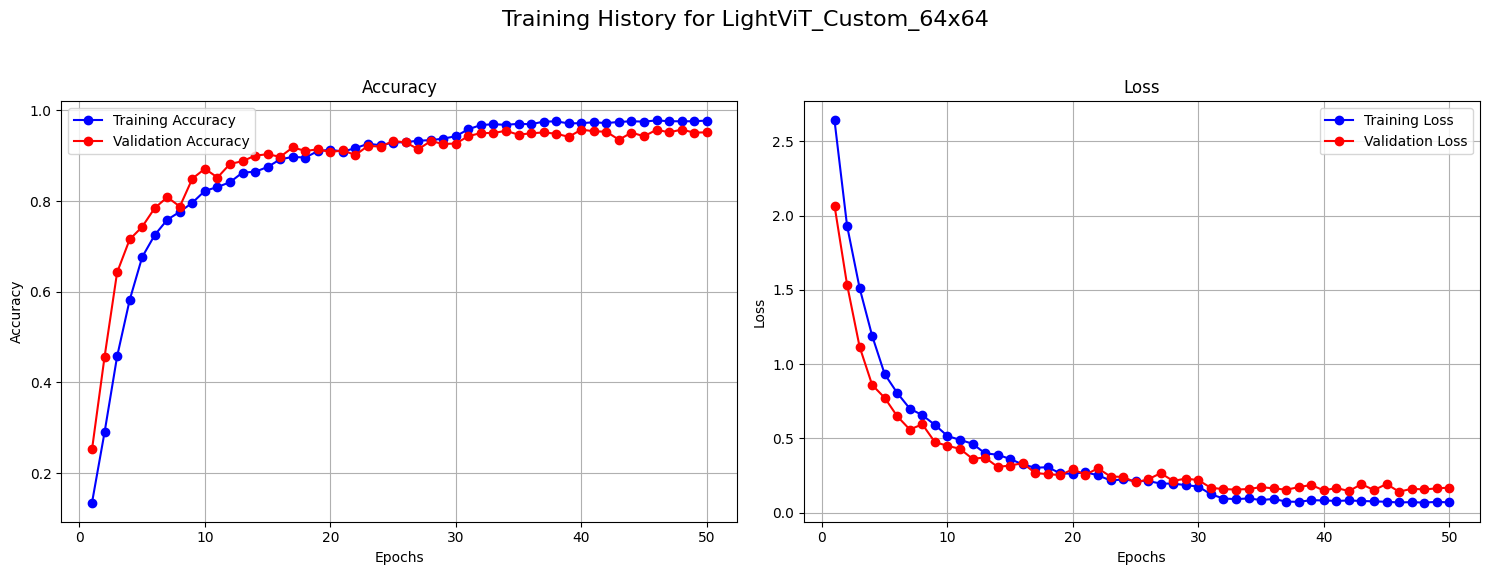


--- Evaluating LightViT_Custom_64x64 ---

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       300
           1       0.95      0.93      0.94       300
           2       0.96      0.98      0.97       300
           3       0.94      0.97      0.95       300
           4       0.95      0.94      0.95       300
           5       0.96      0.94      0.95       300
           6       0.95      0.93      0.94       300
           7       0.98      0.97      0.98       300
           8       0.97      0.99      0.98       300
           9       0.97      0.98      0.97       300

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



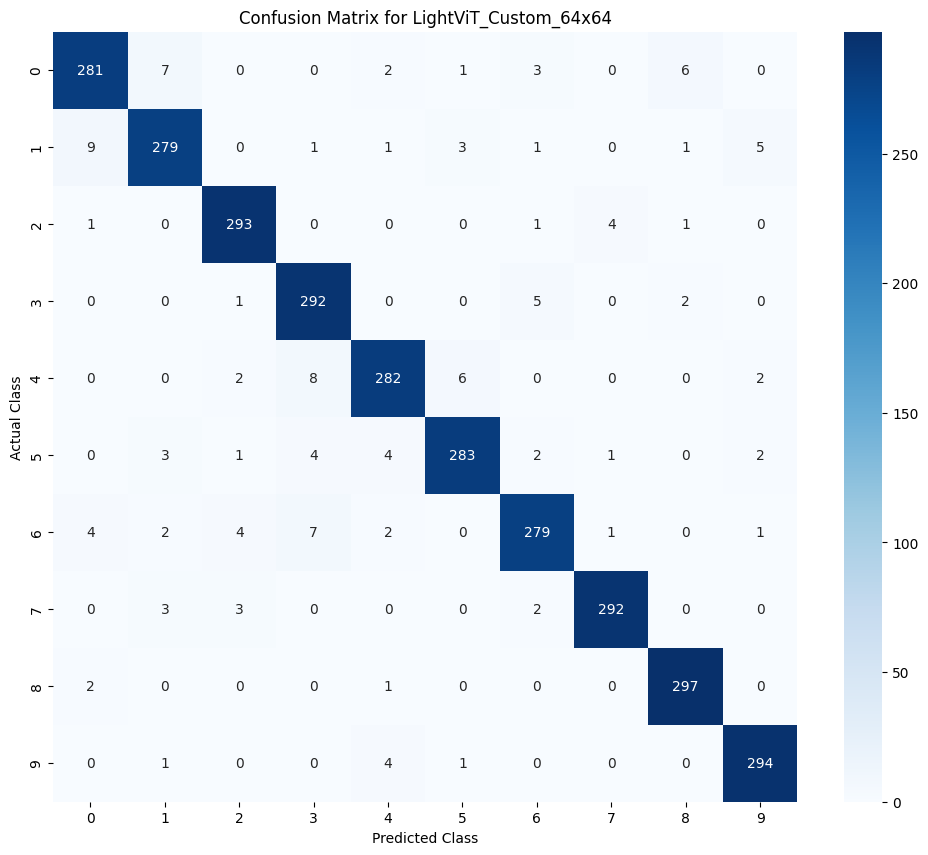

--- EXPERIMENT FOR LightViT_Custom_64x64 FINISHED ---


In [ ]:
run_experiment(VIT_64_CONFIG)

Building the model architecture...
Loading saved weights from: /content/drive/MyDrive/light_vit_custom_64_best.weights.h5
Weights loaded successfully!
Creating a new model to extract intermediate layer output...
Loading sample image: /content/local_datasets/ViT_data_64/validation/0/train_6621_aug_61.jpg
Getting the output of the PatchAndPositionEncoder layer...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Shape of the output tensor: (100, 64)


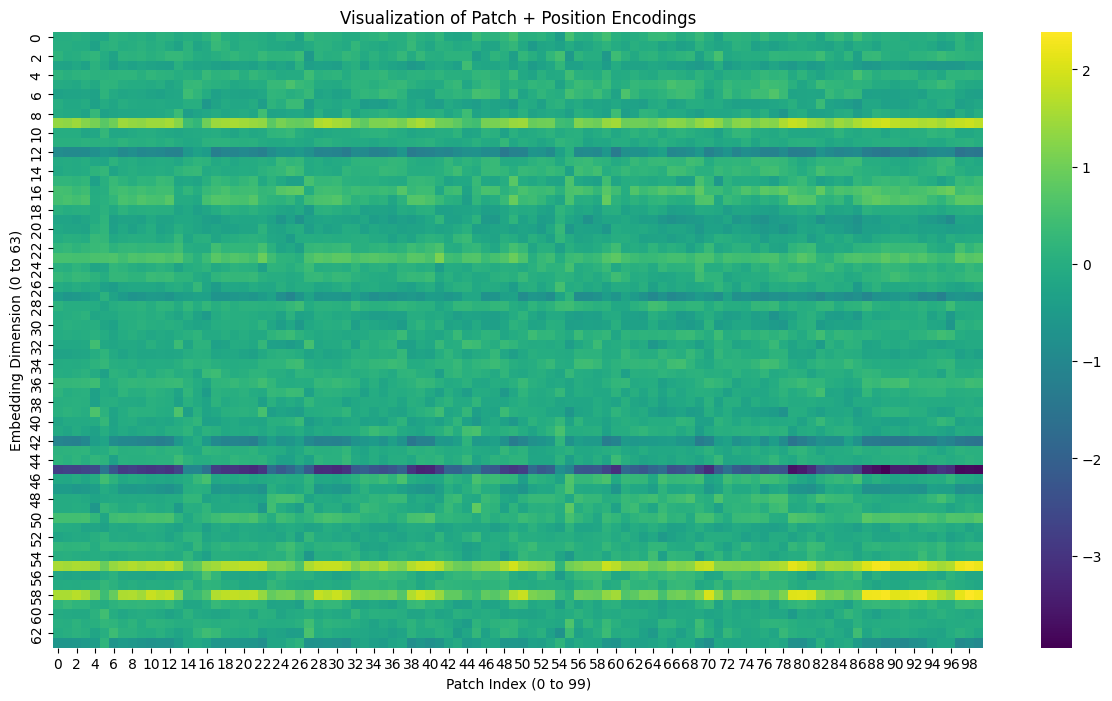

In [10]:
# ==============================================================================
# SECTION 1:  RE-DEFINING THE ARCHITECTURE
# ==============================================================================


COMMON_CONFIG = {
    "NUM_CLASSES": 10,
    "MAX_EPOCHS": 50,
    "BATCH_SIZE": 256, # CORRECTED: Changed to a more reasonable value to prevent OOM errors
    "INITIAL_LEARNING_RATE": 0.001,
    "EARLY_STOP_PATIENCE": 10,
    "LR_PLATEAU_PATIENCE": 5,
    "LR_PLATEAU_FACTOR": 0.5,
    "MIN_LEARNING_RATE": 0.00001
}

# --- Model-Specific Configurations ---
LIGHTWEIGHT_VIT_CONFIG = {
    "num_heads": 4, "hidden_size": 64,
    "num_encoder_blocks": 1, "mlp_dim": 128,
    "dropout_rate": 0.1
}

VIT_256_CONFIG = {
    "model_name": "LightViT_Custom_256x256",
    "data_dir": "/content/local_datasets/ViT_data_256",
    "input_shape": (256, 256, 3),
    "patch_size": 32, "stride": 24,
    "checkpoint_path": "/content/drive/MyDrive/light_vit_custom_256_best.weights.h5",
    **LIGHTWEIGHT_VIT_CONFIG
}

VIT_64_CONFIG = {
    "model_name": "LightViT_Custom_64x64",
    "data_dir": "/content/local_datasets/ViT_data_64",
    "input_shape": (64, 64, 3),
    "patch_size": 8, "stride": 6,
    "checkpoint_path": "/content/drive/MyDrive/light_vit_custom_64_best.weights.h5",
    **LIGHTWEIGHT_VIT_CONFIG
}
# Define the custom layers again
class OverlappingPatches(layers.Layer):
    def __init__(self, patch_size, stride, **kwargs):
        super(OverlappingPatches, self).__init__(**kwargs)
        self.patch_size = patch_size
        self.stride = stride
    def call(self, images):
        batch_size = tf.shape(images)[0]
        images = tf.cast(images, tf.float32)
        patches = tf.image.extract_patches(images=images, sizes=[1, self.patch_size, self.patch_size, 1],
                                           strides=[1, self.stride, self.stride, 1], rates=[1, 1, 1, 1], padding="VALID")
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchAndPositionEncoder(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super(PatchAndPositionEncoder, self).__init__(**kwargs)
        self.num_patches = num_patches
        self.projection = layers.Dense(units=embed_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=embed_dim)
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

class TransformerEncoderBlock(layers.Layer):
    def __init__(self, num_heads, hidden_size, mlp_dim, dropout_rate, **kwargs):
        super(TransformerEncoderBlock, self).__init__(**kwargs)
        self.num_heads, self.hidden_size, self.mlp_dim, self.dropout_rate = num_heads, hidden_size, mlp_dim, dropout_rate
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.attention = layers.MultiHeadAttention(num_heads=self.num_heads, key_dim=self.hidden_size, dropout=self.dropout_rate)
        self.add1 = layers.Add()
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dense1 = layers.Dense(self.mlp_dim, activation=tf.nn.gelu)
        self.dropout1 = layers.Dropout(self.dropout_rate)
        self.dense2 = layers.Dense(self.hidden_size)
        self.dropout2 = layers.Dropout(self.dropout_rate)
        self.add2 = layers.Add()
    def call(self, inputs, training=False):
        x1_norm = self.norm1(inputs)
        attention_output = self.attention(query=x1_norm, value=x1_norm, key=x1_norm, training=training)
        x1_res = self.add1([inputs, attention_output])
        x2_norm = self.norm2(x1_res)
        x2_mlp = self.dense1(x2_norm)
        x2_mlp = self.dropout1(x2_mlp, training=training)
        x2_mlp = self.dense2(x2_mlp)
        x2_mlp = self.dropout2(x2_mlp, training=training)
        x2_res = self.add2([x1_res, x2_mlp])
        return x2_res

# Define the main model builder function again
def build_lightweight_vit(config):
    input_shape = config["input_shape"]
    patch_size, stride, num_heads, hidden_size, num_encoder_blocks, mlp_dim, dropout_rate, num_classes = (
        config["patch_size"], config["stride"], config["num_heads"], config["hidden_size"],
        config["num_encoder_blocks"], config["mlp_dim"], config["dropout_rate"], 10
    )
    num_patches = ((input_shape[0] - patch_size) // stride + 1) * ((input_shape[1] - patch_size) // stride + 1)

    inputs = layers.Input(shape=input_shape)
    rescaled_inputs = layers.Rescaling(1./255)(inputs)
    patches = OverlappingPatches(patch_size, stride)(rescaled_inputs)

    # --- IMPORTANT: Give the target layer a name ---
    encoded_patches = PatchAndPositionEncoder(num_patches, hidden_size, name="patch_and_position_encoder")(patches)

    x = encoded_patches
    for _ in range(num_encoder_blocks):
        x = TransformerEncoderBlock(num_heads, hidden_size, mlp_dim, dropout_rate)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(2048, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(1024, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# ==============================================================================
# SECTION 2: VISUALIZATION SCRIPT
# ==============================================================================

# --- Choose which model to inspect ---
# For example, let's inspect the 64x64 model
config_to_inspect = VIT_64_CONFIG

# 1. Rebuild the model architecture
print("Building the model architecture...")
full_model = build_lightweight_vit(config_to_inspect)

# 2. Load the saved weights
print(f"Loading saved weights from: {config_to_inspect['checkpoint_path']}")
try:
    full_model.load_weights(config_to_inspect['checkpoint_path'])
    print("Weights loaded successfully!")
except Exception as e:
    print(f"Error loading weights: {e}")
    print("Please make sure the checkpoint path is correct and the model was trained.")

# 3. Create the intermediate model
print("Creating a new model to extract intermediate layer output...")
intermediate_layer_model = Model(
    inputs=full_model.input,
    outputs=full_model.get_layer("patch_and_position_encoder").output
)

# 4. Prepare a sample image
# Let's find one image from the validation set
try:
    validation_dir = os.path.join(config_to_inspect['data_dir'], 'validation')
    # Pick the first class folder
    first_class_folder = sorted([d for d in os.listdir(validation_dir) if os.path.isdir(os.path.join(validation_dir, d))])[0]
    # Pick the first image in that folder
    first_image_name = os.listdir(os.path.join(validation_dir, first_class_folder))[0]
    sample_image_path = os.path.join(validation_dir, first_class_folder, first_image_name)

    print(f"Loading sample image: {sample_image_path}")

    # Load and preprocess the image
    img = tf.keras.utils.load_img(sample_image_path, target_size=(config_to_inspect['input_shape'][0], config_to_inspect['input_shape'][1]))
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0) # Add batch dimension

    # 5. Get the output and visualize it
    print("Getting the output of the PatchAndPositionEncoder layer...")
    pos_embeddings = intermediate_layer_model.predict(img_batch)

    # pos_embeddings shape will be (1, num_patches, hidden_size) e.g., (1, 100, 64)
    # Remove the batch dimension for plotting
    pos_embeddings_squeezed = pos_embeddings[0]

    print(f"Shape of the output tensor: {pos_embeddings_squeezed.shape}")

    # Visualize as a heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(pos_embeddings_squeezed.T, cmap='viridis') # Transpose for better visualization
    plt.title("Visualization of Patch + Position Encodings")
    plt.xlabel("Patch Index (0 to 99)")
    plt.ylabel("Embedding Dimension (0 to 63)")
    plt.show()

except Exception as e:
    print(f"\nAn error occurred during visualization. Please ensure data paths are correct.")
    print(f"Data directory being checked: {config_to_inspect['data_dir']}")
    print(f"Error details: {e}")